In [1]:
import os
import numpy as np
import glob
import random
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
ROOMS_PATHS = "../data/original_data/rooms_from_basement_renovator"
DERIVED_ROOMS_PATHS = "../data/derived_data/rooms"

os.makedirs(DERIVED_ROOMS_PATHS, exist_ok=True)

In [3]:
glob.glob(f"{ROOMS_PATHS}/*")

['../data/original_data/rooms_from_basement_renovator/01_basement',
 '../data/original_data/rooms_from_basement_renovator/13_sheol',
 '../data/original_data/rooms_from_basement_renovator/16_chest',
 '../data/original_data/rooms_from_basement_renovator/09_womb',
 '../data/original_data/rooms_from_basement_renovator/02_cellar',
 '../data/original_data/rooms_from_basement_renovator/04_caves',
 '../data/original_data/rooms_from_basement_renovator/03_burning basement',
 '../data/original_data/rooms_from_basement_renovator/08_dank depths',
 '../data/original_data/rooms_from_basement_renovator/06_depths',
 '../data/original_data/rooms_from_basement_renovator/12_blue womb',
 '../data/original_data/rooms_from_basement_renovator/05_catacombs',
 '../data/original_data/rooms_from_basement_renovator/00_special_rooms',
 '../data/original_data/rooms_from_basement_renovator/10_utero',
 '../data/original_data/rooms_from_basement_renovator/14_cathedral',
 '../data/original_data/rooms_from_basement_renov

In [10]:
img = Image.open(f"{ROOMS_PATHS}/01_basement/01.png").convert("RGB")

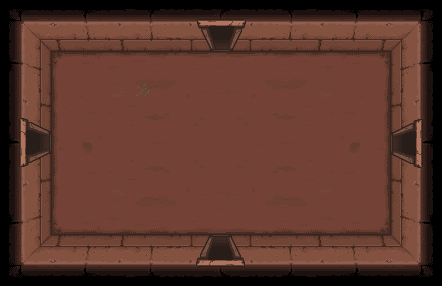

In [11]:
img.show()

In [12]:
img_arr = np.array(img)
img_arr.shape

(286, 442, 3)

In [37]:
img_arr[53:-51,53:-51,:].shape

(182, 338, 3)

In [36]:
182 / 7

26.0

In [40]:
338 / 13

26.0

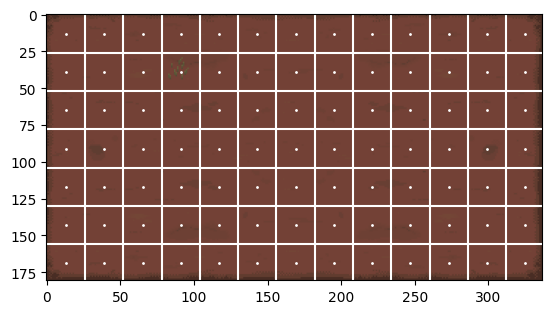

In [66]:
ax = plt.imshow(img_arr[53:-52,53:-52,:])
for i in range(12):
    plt.axvline(x = 26*(i+1), color = 'w')
    
for i in range(6):
    plt.axhline(y = 26*(i+1), color = 'w')

points = [(i*26 + (26/2),j*26 + (26/2)) for i in range(13) for j in range(7)]

for p in points:
    plt.scatter([p[0]],[p[1]], c="w", s=1)

plt.show()

In [95]:
altar = Image.open("../data/derived_data/item_altars/item_altar_001.png").convert("RGBA")


In [163]:
MARGIN_WIDTH = 52
MARGIN_HEIGHT = 53

In [164]:
def paste_in_room(room, obj, coordinates = (0,0)):
    dest = MARGIN_WIDTH + ((coordinates[0]) * 26), MARGIN_HEIGHT + ((coordinates[1]) * 26)
    room.alpha_composite(obj, dest=dest)

In [165]:
img = Image.open(f"{ROOMS_PATHS}/01_basement/01.png")

In [166]:
altar = Image.open("../data/derived_data/item_altars/item_altar_001.png")

In [167]:
for i in range(13):
    for j in range(7):
        paste_in_room(img, altar, coordinates=(i,j))

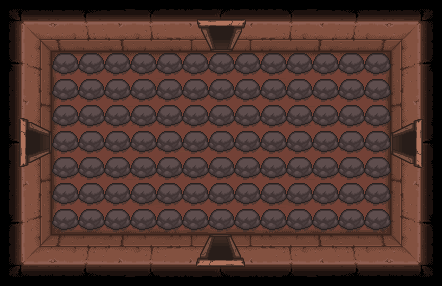

In [168]:
img.convert("RGB")